# 条件付き確率・全確率・ベイズの定理（最短まとめ）

このノートは、**条件付き確率・全確率・ベイズの定理**の関係を、最短で思い出せる形に整理する。
記号の意味（同時事象と条件付け）を混同しないために、**集合・分解・代入**の順で示す。

## 1. 記号の役割（同時事象と条件付け）

- **同時事象**（両立）：
  \(P(A \cap B)\)
- **条件付き**（条件の世界に絞る）：
  \(P(A\mid B)=\dfrac{P(A\cap B)}{P(B)}\)

> **ポイント**：
> カンマ（同時）と縦線（条件付け）は別物。
> **集合で書けば混乱しない。**

## 2. 全確率の法則（分母の作り方）

二値ラベル \(Y\in\{1,0\}\) なら、任意の事象 \(E\) は

\[
E=(E\cap\{Y=1\})\cup(E\cap\{Y=0\})
\]

なので

\[
P(E)=P(E\mid Y=1)P(Y=1)+P(E\mid Y=0)P(Y=0)
\]

> **分母は分割して足す**（全確率）。
> ここでは条件付けに“戻さない”。

## 3. ベイズの定理（最短形）

\[
P(Y=1\mid E)=\frac{P(E\mid Y=1)P(Y=1)}{P(E\mid Y=1)P(Y=1)+P(E\mid Y=0)P(Y=0)}
\]

比で書けば

\[
P(Y=1\mid E)=\frac{1}{1+m},\quad m=\frac{P(E\mid Y=0)P(Y=0)}{P(E\mid Y=1)P(Y=1)}
\]

> **実戦では m を作って \(1/(1+m)\) に落とす**のが最短。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 4. 例：検査1回の陽性で感染確率は？

- 事前：\(P(Y=1)=0.001\)
- 感度：\(P(X_1=+\mid Y=1)=0.999\)
- 偽陽性率：\(P(X_1=+\mid Y=0)=0.001\)

In [2]:
p = 0.001
sens = 0.999
fpr = 0.001

post1 = (sens * p) / (sens * p + fpr * (1 - p))
post1


0.5

## 5. 例：陽性後に「2回目も陽性」なら？

- 2回目（1回目陽性の世界）：
  \(P(X_2=+\mid X_1=+,Y=1)=0.95\)
  \(P(X_2=+\mid X_1=+,Y=0)=0.05\)

In [3]:
sens2 = 0.95
fpr2 = 0.05

post2 = (sens2 * sens * p) / (sens2 * sens * p + fpr2 * fpr * (1 - p))
post2


0.95

## 6. 数表（事前・事後の比較）

In [4]:
summary = pd.DataFrame({
    "項目": ["事前 P(Y=1)", "1回陽性後", "2回陽性後"],
    "確率": [p, post1, post2],
})
summary


,項目,確率
0,事前 P(Y=1),0.001
1,1回陽性後,0.500
2,2回陽性後,0.950


## 7. 表：10万人あたりの期待人数（1回検査）

全確率の分母が「分割の足し算」になることが視覚化できる。

In [5]:
population = 100_000
infected = population * p
not_infected = population * (1 - p)

true_positive = infected * sens
false_positive = not_infected * fpr

confusion = pd.DataFrame({
    "状態": ["感染", "非感染"],
    "陽性": [true_positive, false_positive],
    "陰性": [infected - true_positive, not_infected - false_positive],
})
confusion


,状態,陽性,陰性
0,感染,99.9,0.1
1,非感染,99.9,99800.1


## 8. グラフ：事前→事後の更新

/tmp/ipykernel_547931/3514088133.py:11: UserWarning: Glyph 20107 (\N{CJK UNIFIED IDEOGRAPH-4E8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_547931/3514088133.py:11: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_547931/3514088133.py:11: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_547931/3514088133.py:11: UserWarning: Glyph 38525 (\N{CJK UNIFIED IDEOGRAPH-967D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_547931/3514088133.py:11: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_547931/3514088133.py:11: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_547931/3514088133.py:11: UserWarning: Glyph 30906 (\N{CJK UNIFIED I

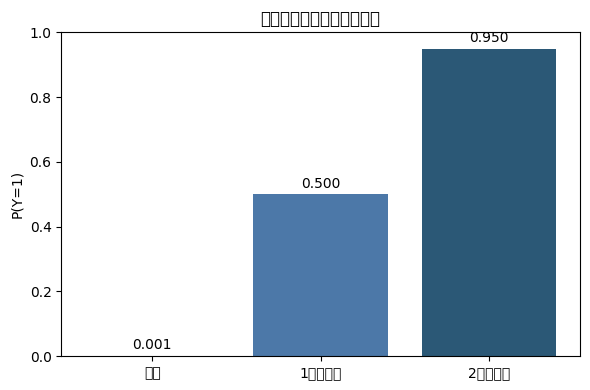

In [6]:
plt.figure(figsize=(6, 4))
labels = ["事前", "1回陽性後", "2回陽性後"]
values = [p, post1, post2]

plt.bar(labels, values, color=["#7aa6c2", "#4c78a8", "#2b5876"])
plt.ylim(0, 1)
plt.ylabel("P(Y=1)")
plt.title("事前確率と事後確率の比較")
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.3f}", ha="center")
plt.tight_layout()


## 9. 手順まとめ（最短版）

1. **E を決める**（観測・条件）
2. **分母を全確率で作る**：
   \(P(E)=P(E\mid Y=1)P(Y=1)+P(E\mid Y=0)P(Y=0)\)
3. **分子は分母の第1項**（流用）
4. **比 m に落として \(1/(1+m)\)**

> これが「同時事象」と「条件付け」を混同しない最短ルート。